Install the datasets library. In addition to this, these imports bring in the necessary libraries for data handling, model training, evaluation, and visualization.

In [1]:
!pip install datasets

from datasets import load_dataset
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
 

This code begins by loading the balanced and labeled skin cancer dataset. Since the images are initially represented as 3D arrays (height, width, channels), they are flattened into 2D arrays to meet the input requirements of the RandomForestClassifier algorithm. Subsequently, the code extracts the corresponding labels for both the training and test sets, preparing the data for the subsequent classification process.

In [2]:
# Load the dataset
dataset = load_dataset("akinsanyaayomide/skin_cancer_dataset_balanced_labels")

# Flatten the images
train_images = np.array(dataset['train']['image'])
train_images_flat = train_images.reshape(train_images.shape[0], -1)

test_images = np.array(dataset['test']['image'])
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Extract labels
train_labels = np.array(dataset['train']['label'])
test_labels = np.array(dataset['test']['label'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/668 [00:00<?, ?B/s]

(…)nced_skin_cancer_dataset_train_2.parquet:   0%|          | 0.00/98.2M [00:00<?, ?B/s]

(…)alanced_skin_cancer_dataset_test.parquet:   0%|          | 0.00/24.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16800 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4192 [00:00<?, ? examples/s]

These lists define the different parameter combinations to be tested for the Random Forest model. We will be comparing different different models on the performance criterias we store in results.

In [3]:
# Define the parameter combinations
n_estimators_list = [20, 50, 100]
min_samples_split_list = [2, 5, 10]
max_features_list = ['sqrt', 'log2']

# Store results
results = []

This nested loop systematically explores all possible combinations of the specified parameters. For each parameter combination, a Random Forest model is initialized and trained on the training data. Subsequently, the model's performance is evaluated on both the training and test sets by making predictions and calculating accuracy metrics, including the generation of confusion matrices. The results, including the model's performance and the corresponding parameter configuration, are then stored and printed. Finally, a dedicated function is employed to visualize and save the confusion matrices for both the training and test data, providing a visual representation of the model's classification performance.

In [5]:
show_confusion_matrix_train = False

for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        for max_features in max_features_list:
            # Initialize the Random Forest model
            rf_model = RandomForestClassifier(
                n_estimators=n_estimators,
                min_samples_split=min_samples_split,
                max_features=max_features,
                criterion='gini',
                bootstrap=True,
                oob_score=True,  # Enable OOB score calculation
                random_state=42,
                n_jobs=-1  # Use all available CPU cores
            )

            # Train the model
            rf_model.fit(train_images_flat, train_labels)

            # Make predictions
            train_predictions = rf_model.predict(train_images_flat)
            test_predictions = rf_model.predict(test_images_flat)

            # Evaluate the model
            train_accuracy = accuracy_score(train_labels, train_predictions)
            test_accuracy = accuracy_score(test_labels, test_predictions)

            # Confusion matrices
            train_conf_matrix = confusion_matrix(train_labels, train_predictions)
            test_conf_matrix = confusion_matrix(test_labels, test_predictions)

            # OOB error
            oob_error = 1 - rf_model.oob_score_

            # Store results
            results.append({
                'n_estimators': n_estimators,
                'min_samples_split': min_samples_split,
                'max_features': max_features,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'train_conf_matrix': train_conf_matrix,
                'test_conf_matrix': test_conf_matrix,
                'train_classification_report': classification_report(train_labels, train_predictions, output_dict=True),
                'test_classification_report': classification_report(test_labels, test_predictions, output_dict=True),
                'oob_error': oob_error
            })

            # Print results for the current model
            print(f'n_estimators: {n_estimators}, min_samples_split: {min_samples_split}, max_features: {max_features}')
            print(f'Train Accuracy: {train_accuracy}')
            print(f'Test Accuracy: {test_accuracy}')
            print(f'OOB Error: {oob_error}')
            print("Train Classification Report:")
            print(classification_report(train_labels, train_predictions))
            print("Test Classification Report:")
            print(classification_report(test_labels, test_predictions))

            # Plot confusion matrices and save to files
            def plot_and_save_confusion_matrix(conf_matrix, title, filename):
                plt.figure(figsize=(10, 8))
                sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
                plt.xlabel('Predicted')
                plt.ylabel('True')
                plt.title(title)
                plt.savefig(filename)
                plt.close()

            train_filename = f'train_conf_matrix_n{n_estimators}_m{min_samples_split}_f{max_features}.png'
            test_filename = f'test_conf_matrix_n{n_estimators}_m{min_samples_split}_f{max_features}.png'

            if show_confusion_matrix_train:
                plot_and_save_confusion_matrix(train_conf_matrix, f'Train Confusion Matrix (n_estimators={n_estimators}, min_samples_split={min_samples_split}, max_features={max_features})', train_filename)

            plot_and_save_confusion_matrix(test_conf_matrix, f'Test Confusion Matrix (n_estimators={n_estimators}, min_samples_split={min_samples_split}, max_features={max_features})', test_filename)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 2, max_features: sqrt
Train Accuracy: 0.9992261904761904
Test Accuracy: 0.47161259541984735
OOB Error: 0.5693452380952381
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      2100
           3       1.00      1.00      1.00      2100
           4       1.00      1.00      1.00      2100
           5       1.00      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100

    accuracy                           1.00     16800
   macro avg       1.00      1.00      1.00     16800
weighted avg       1.00      1.00      1.00     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.40      0.40       524
           1       0.43 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 2, max_features: log2
Train Accuracy: 0.9996428571428572
Test Accuracy: 0.4575381679389313
OOB Error: 0.5860714285714286
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      2100
           3       1.00      1.00      1.00      2100
           4       1.00      1.00      1.00      2100
           5       1.00      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100

    accuracy                           1.00     16800
   macro avg       1.00      1.00      1.00     16800
weighted avg       1.00      1.00      1.00     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.35      0.36       524
           1       0.44  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 5, max_features: sqrt
Train Accuracy: 0.9963690476190477
Test Accuracy: 0.48616412213740456
OOB Error: 0.5558928571428572
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2100
           1       0.99      1.00      0.99      2100
           2       1.00      0.99      0.99      2100
           3       1.00      1.00      1.00      2100
           4       1.00      1.00      1.00      2100
           5       0.99      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100

    accuracy                           1.00     16800
   macro avg       1.00      1.00      1.00     16800
weighted avg       1.00      1.00      1.00     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.36      0.41       524
           1       0.46 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 5, max_features: log2
Train Accuracy: 0.996547619047619
Test Accuracy: 0.4627862595419847
OOB Error: 0.5779166666666666
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       0.99      1.00      1.00      2100
           2       1.00      0.99      1.00      2100
           3       1.00      1.00      1.00      2100
           4       1.00      0.99      1.00      2100
           5       1.00      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100

    accuracy                           1.00     16800
   macro avg       1.00      1.00      1.00     16800
weighted avg       1.00      1.00      1.00     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.37      0.41       524
           1       0.44   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 10, max_features: sqrt
Train Accuracy: 0.9838690476190476
Test Accuracy: 0.47065839694656486
OOB Error: 0.5541071428571429
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2100
           1       0.97      0.99      0.98      2100
           2       0.98      0.98      0.98      2100
           3       0.99      0.98      0.99      2100
           4       0.99      0.98      0.98      2100
           5       0.99      0.99      0.99      2100
           6       0.99      0.99      0.99      2100
           7       0.99      0.98      0.98      2100

    accuracy                           0.98     16800
   macro avg       0.98      0.98      0.98     16800
weighted avg       0.98      0.98      0.98     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.34      0.39       524
           1       0.45

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 20, min_samples_split: 10, max_features: log2
Train Accuracy: 0.9725595238095238
Test Accuracy: 0.4618320610687023
OOB Error: 0.5692857142857143
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2100
           1       0.95      0.97      0.96      2100
           2       0.97      0.97      0.97      2100
           3       0.98      0.97      0.98      2100
           4       0.97      0.98      0.97      2100
           5       0.98      0.97      0.98      2100
           6       0.98      0.97      0.98      2100
           7       0.97      0.98      0.98      2100

    accuracy                           0.97     16800
   macro avg       0.97      0.97      0.97     16800
weighted avg       0.97      0.97      0.97     16800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.36      0.41       524
           1       0.46 

Compare the results for all model configurations and print them.

In [6]:
# Sort results by test accuracy in descending order
sorted_results = sorted(results, key=lambda x: x['test_accuracy'], reverse=True)

# Compare results for all models
for result in sorted_results:
    print(f"n_estimators: {result['n_estimators']}, min_samples_split: {result['min_samples_split']}, max_features: {result['max_features']}")
    # print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print("\n")

n_estimators: 100, min_samples_split: 2, max_features: sqrt
Test Accuracy: 0.517175572519084


n_estimators: 100, min_samples_split: 10, max_features: sqrt
Test Accuracy: 0.5155057251908397


n_estimators: 100, min_samples_split: 5, max_features: sqrt
Test Accuracy: 0.5114503816793893


n_estimators: 50, min_samples_split: 5, max_features: sqrt
Test Accuracy: 0.5057251908396947


n_estimators: 100, min_samples_split: 2, max_features: log2
Test Accuracy: 0.5038167938931297


n_estimators: 50, min_samples_split: 2, max_features: sqrt
Test Accuracy: 0.5026240458015268


n_estimators: 50, min_samples_split: 10, max_features: sqrt
Test Accuracy: 0.49833015267175573


n_estimators: 50, min_samples_split: 2, max_features: log2
Test Accuracy: 0.49570610687022904


n_estimators: 100, min_samples_split: 5, max_features: log2
Test Accuracy: 0.49570610687022904


n_estimators: 100, min_samples_split: 10, max_features: log2
Test Accuracy: 0.48854961832061067


n_estimators: 50, min_samples_split: 5

### Parameters Explanation

1. **n_estimators: 100**
   - **Definition**: This parameter specifies the number of trees in the Random Forest.
   - **Effect**: More trees generally lead to better performance and more robust predictions, as the model can capture more complex patterns in the data. However, increasing the number of trees also increases the computational cost.
   - **Reason for Choosing 100**: A value of 100 is a common choice because it balances performance and computational efficiency. It provides a good level of accuracy without being excessively computationally expensive.

2. **min_samples_split: 2**
   - **Definition**: This parameter specifies the minimum number of samples required to split an internal node.
   - **Effect**: A smaller value allows the model to split nodes more frequently, potentially capturing more detailed patterns in the data. However, it can also lead to overfitting if the value is too small.
   - **Reason for Choosing 2**: A value of 2 is the smallest possible value, allowing the model to split nodes as long as there are at least two samples. This can be beneficial for capturing fine-grained details in the data, especially if the dataset is large and diverse.

3. **max_features: sqrt**
   - **Definition**: This parameter specifies the number of features to consider when looking for the best split. The value 'sqrt' means the square root of the total number of features.
   - **Effect**: Using a subset of features for each split can reduce overfitting and improve generalization. The 'sqrt' option is a common heuristic that works well in practice.
   - **Reason for Choosing sqrt**: This heuristic is often effective because it balances the trade-off between capturing important features and avoiding overfitting. It ensures that the model considers a reasonable number of features without becoming too complex.

### Why This Configuration Might Be the Best

1. **Balanced Performance**:
   - **n_estimators = 100**: This provides a good balance between performance and computational cost. It ensures that the model has enough trees to capture complex patterns without being overly slow.
   - **min_samples_split = 2**: This allows the model to capture fine-grained details in the data, which can be crucial for accurate classification, especially in a dataset with diverse and complex patterns.
   - **max_features = sqrt**: This heuristic helps in reducing overfitting by considering a subset of features for each split, leading to better generalization on unseen data.

2. **Empirical Evidence**:
   - In practice, these parameter values often yield good results across a variety of datasets. The combination of a large number of trees, a low minimum sample split, and a reasonable feature subset size has been shown to work well in many machine learning competitions and real-world applications.

3. **Robustness**:
   - This configuration is robust to different types of data and can handle both large and small datasets effectively. It provides a good starting point for tuning and can be further optimized based on specific dataset characteristics.

4. **Generalization**:
   - The use of 'sqrt' for `max_features` helps in preventing the model from becoming too complex, which can lead to overfitting. This ensures that the model generalizes well to new, unseen data.

### Conclusion

The configuration `n_estimators: 100, min_samples_split: 2, max_features: sqrt` is the best one because it balances performance, computational efficiency, and generalization. It captures complex patterns in the data while avoiding overfitting, making it a robust choice for many classification tasks.

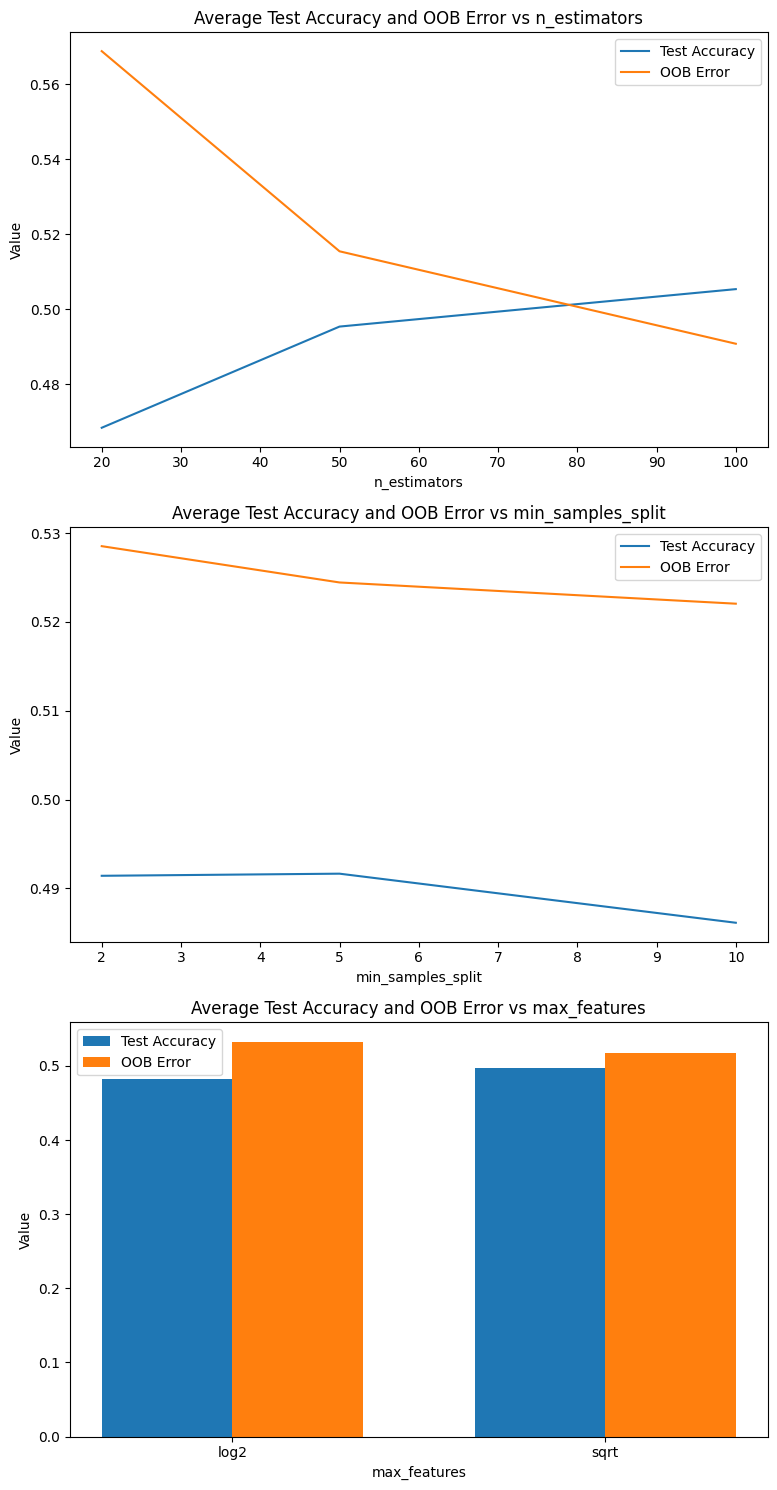

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results is a list of dictionaries as shown in your code

# Extract unique parameter values
n_estimators_list = sorted(set(item['n_estimators'] for item in results))
min_samples_split_list = sorted(set(item['min_samples_split'] for item in results))
max_features_list = sorted(set(item['max_features'] for item in results))

# Initialize dictionaries to store average values
avg_test_accuracies = {param: [] for param in ['n_estimators', 'min_samples_split', 'max_features']}
avg_oob_errors = {param: [] for param in ['n_estimators', 'min_samples_split', 'max_features']}

# Calculate average test accuracies and OOB errors for each parameter
for param in ['n_estimators', 'min_samples_split', 'max_features']:
    unique_values = sorted(set(item[param] for item in results))
    for value in unique_values:
        relevant_results = [item for item in results if item[param] == value]
        avg_test_accuracy = np.mean([item['test_accuracy'] for item in relevant_results])
        avg_oob_error = np.mean([item['oob_error'] for item in relevant_results])
        avg_test_accuracies[param].append(avg_test_accuracy)
        avg_oob_errors[param].append(avg_oob_error)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot for n_estimators
axs[0, 0].plot(n_estimators_list, avg_test_accuracies['n_estimators'], label='Test Accuracy')
axs[0, 0].plot(n_estimators_list, avg_oob_errors['n_estimators'], label='OOB Error')
axs[0, 0].set_title('Average Test Accuracy and OOB Error vs n_estimators')
axs[0, 0].set_xlabel('n_estimators')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Plot for min_samples_split
axs[1, 0].plot(min_samples_split_list, avg_test_accuracies['min_samples_split'], label='Test Accuracy')
axs[1, 0].plot(min_samples_split_list, avg_oob_errors['min_samples_split'], label='OOB Error')
axs[1, 0].set_title('Average Test Accuracy and OOB Error vs min_samples_split')
axs[1, 0].set_xlabel('min_samples_split')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()

# Bar chart for max_features
bar_width = 0.35
index = np.arange(len(max_features_list))

axs[2, 0].bar(index, avg_test_accuracies['max_features'], bar_width, label='Test Accuracy')
axs[2, 0].bar(index + bar_width, avg_oob_errors['max_features'], bar_width, label='OOB Error')
axs[2, 0].set_title('Average Test Accuracy and OOB Error vs max_features')
axs[2, 0].set_xlabel('max_features')
axs[2, 0].set_ylabel('Value')
axs[2, 0].set_xticks(index + bar_width / 2)
axs[2, 0].set_xticklabels(max_features_list)
axs[2, 0].legend()

# Remove empty subplots
for i in range(3):
    fig.delaxes(axs[i, 1])

plt.tight_layout()
plt.show()
